<a href="https://colab.research.google.com/github/jwgdmkj/jupiterColab/blob/master/unsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)


"""
supervised러닝 = input data를 x y축으로 하고, 선형적으로 학습하게함
실제 파란색y값과 예측값(적색)간의 차이를 줄이는 것이 목표(이 차이가 loss)
loss의 정의: MSE(1/n 시그마(예측값 - y)), 이때 예측값 =Wx+b
W와 B는 처음에 RANDOM이며, 이는 학습해가며 비슷해지게 됨

unsupervised러닝은, y값이 없고, input데이터만 존재
Wx+b, 어던 값 x를 넣을 때 결과값 y과 x 자기자신이 되도록 하는 것이 "오토인코더"
"""


(60000, 28, 28)
(10000, 28, 28)


'\nsupervised러닝 = input data를 x y축으로 하고, 선형적으로 학습하게함\n실제 파란색y값과 예측값(적색)간의 차이를 줄이는 것이 목표(이 차이가 loss)\nloss의 정의: MSE(1/n 시그마(예측값 - y)), 이때 예측값 =Wx+b\nW와 B는 처음에 RANDOM이며, 이는 학습해가며 비슷해지게 됨\n\nunsupervised러닝은, y값이 없고, input데이터만 존재\nWx+b, 어던 값 x를 넣을 때 결과값 y과 x 자기자신이 되도록 하는 것이 "오토인코더"\n'

In [ ]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model

train_images.shape

#train image를 2차원 형태에서 1차원으로 펴준다
#60000 by 28*28 = 784의 shape를 갖도록 하려 함. 
#이때, 첫번쨰 인자는 그대로 [0]의 60000, 두번째는 28*28로 할 수 있다.
#-1로 하면, 전체의 shape 중 60000과, 나머지는 28*28임을 저절로 안다(by numpy)
#x_train = train_images.reshape((train_images.shape[0], -1))

#x_test = test_images.reshape((test_images.shape[0], -1))

(60000, 28, 28)

In [ ]:
"""
input_img = Input(shape = (784,))
encoded = Dense(64, activation= 'relu')(input_img) #첫번째 레이어: 임의로 여러개
encoded = Dense(2, activation = 'relu')(encoded) #두번째: 없이, 바로 latent벡터 뽑아냄, 2로 설정

decoded = Dense(64, activation = 'relu')(encoded)
#sigmoid: 출력값을 0~1 사이로 맞춰줌. output 이미지가 흑빅이기에
decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

# 자기 자신이 그대로 나오게끔 해야 하기에, x와  y인자에 자기 자신을 다 넣음
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, validation_split =0.1)

"""
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    #28*28을 펴고(flatten) 64로 relu dense 시키고
    #sigmoid방식으로 디코딩하는 것을 계속 반복
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

#다 하면 커마일 후 fit
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0397 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0123 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [ ]:
# 테스트 세트에서 이미지를 인코딩 및 디코딩하여 테스트해 보겠습니다.
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
#x_test.shape
#decoded_imgs = autoencoder.predict(x_test)
#decoded_imgs.shape

(10000, 28, 28)

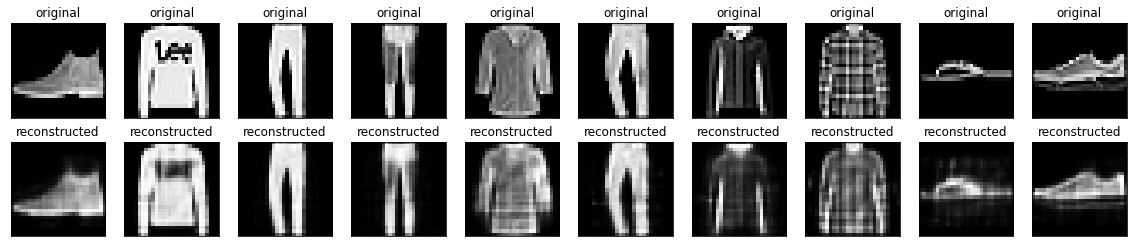

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

#visualization을 해보자
#인코딩 - 디코딩 중간값을 뽑아본다.
#input 데이터에, 뽑고자 하는 encoded를 넣는다
#인코딩된 벡터가 나오게 될 것이다. 두개의 차원(latent벡터가)으로 압축된 것이 나옴
#x_test 데이터를 넣어보면 (10000,2) 가 나올 것
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

ValueError: ignored

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:,1], c=test_labels, cmap=plt.cm.jet)
plt.colorbar()
plt.show()